<a href="https://colab.research.google.com/github/Jmorgado125/ADA-Informes/blob/main/Informe_(Cutting_a_Rod).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cutting a Rod

#1. Descripcion del Problema

![image](https://imgur.com/8R1wQZd.png)

### Problema de omptimizacion de ventas : **Corte de varillas**

---

**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

---

Una empresa que vende varillas de metal, busca sacar el maximo beneficio en la venta de sus varillas, cortando la varilla en partes que maximicen las ganancias. 

#2. Implementacion Algoritmo de programacion dinamica

Una solución ingenua a este problema es solucionarlo a fuerza bruta y generar todas las configuraciones de diferentes piezas y encontrar la configuración de mayor precio. Esta solución es exponencial en términos de complejidad temporal.

 Este problema posee las dos propiedades importantes y es posible resolverse de manera eficiente utilizando la programación dinámica.


**1) Subestructura óptima:**

La solución óptima se construye de soluciones óptimas de subproblemas.
Podemos obtener el mejor precio haciendo un corte en diferentes posiciones generando subproblemas y comparando los valores obtenidos de la solucion de estos después de un corte.
De manera recursiva llamamos una funcion $Cortar(n)$ ,el valor obtenido sera el mejor valor posible para una barra de longitud n. Cortar(n) se puede escribir de la siguiente manera.
$Cortar(n) = max(price[i] + Cortar(n-i-1))$ para todo i en ${0, 1 .. n-1}$

**2)Subproblema sobrelapados**

Un segundo ingrediente que deberíamos tener en cuenta para aplicar programación dinámica, es que el **espacio de subproblemas sea pequeño**. 
En otras palabras, que la cantidad total de problemas distintos que tengamos que resolver no sea muy alta.
Cuando un algoritmo recursivo revisita el mismo subproblema varias veces, se dice que el problema tiene **subproblemas sobrelapados**, la **Programación dinámica toma ventaja de los subproblemas sobrelapados ya que los resuelve sólo una vez** y cada vez que se encuentra nuevamente con ellos este accede al resultado anteriormente obtenido.

![image](https://imgur.com/wQH9i3R.png)

Habiendo observado que para resolver un problema debemos antes resolver los problemas más pequeños, un acercamiento **bottom-up** es ideal para encontrar una solucion.

Como opera el bottom-up:


- Ordenamos los subproblemas por tamaño de menor a mayor.
- Guardamos los resultados asociados a cada subproblema.
- Cuando resolvemos un subproblema, basta con **utilizar los resultados** de los problemas más pequeños que ya fueron resueltos con anterioridad. **sin la necesidad de volver a resolverlos**

![image](https://imgur.com/u6bRjh1.png)

*(Figura muestra la relacion existente entre los subproblemas con un n=4)*


**Solucion con programacion dinamica**

*Pseudocodigo Button-up*

![image](https://imgur.com/uMD2gWd.png)

In [9]:
def BottomUpCutRod(p, next):

    r = [0] * (n+1)                 # Creacion de arreglo de maximos
    s = [[]] * (n+1)                # Creacion arreglo de cortes
    neg = sum(p) *-1
    sp = 0                          # Contador de sub problemas

    for j in range (1,n+1):         # Iteracion para calcular cada maximo r_j
        
        sp = sp + 1

        

        q = neg                     # Establecer un valor negativo
        c = [n]                     # Establecer el arreglo de cortes base

        if j == 1:               
            r[1] = p[0]
            s[1] = [1]

          
        
        for i in range(1, j+1):     # Loop para encontrar el maximo r- entre las posibilidades
            q2 = p[i-1] + r[j-i]
            if q > q2 :
                q = q
                c = c
            
            else:

                q = q2
                
                if i == 0 :
                    c = []
                else :
                    c = [i]

                for x in s[j-i]:
                    c.append(x)

        r[j] = q
        s[j] = c
    

    return r[n], s[n], sp


# Ejemplo

p = [1,5,8,9,10,17,17,20]
n = 8

retorno, cortes , sp = BottomUpCutRod(p,n)

print("Retorno maximo para ", n, "elementos : ", retorno)
print("Largo de los cortes : ", cortes)

Retorno maximo para  8 elementos :  22
Largo de los cortes :  [6, 2]


**Solucion resuelta de manera recursiva.**

In [7]:
def RecursiveCut(p,n, j = 1):

    if n == 0:
        return 0, j, []
        
    q = 0
    cf = []  # Arreglo de Cortes 
    for i in range(1,n+1):

        # LLamada recursiva de la funcion
        r, j , c= RecursiveCut(p,n-i, j = j+1)

        if q > p[i-1] + r:
            q = q

        else:
            q = p[i-1] + r
            cf = [i] + c
    return q, j, cf

p = [1,5,8,9,10,17,17,20,24,30]
n = 4

mx, ll , ct= RecursiveCut(p,n)
print(f"Se ha calculado el maximo {mx} con {ll} llamadas recursivas")
print(f"Los cortes son : {ct}")

Se ha calculado el maximo 10 con 16 llamadas recursivas
Los cortes son : [2, 2]


#3. Correctitud

Para determinar la correctitud del **bottom-up** es a traves de induccion.

![image](https://imgur.com/ggvpiQY.png)

**Hipotesis**: Para resolver la $N-esima$ solucion es necesario acceder al resultado de la anterior solucion $N-1$ ya resuelto en $R[N-1]$ , es decir que para obtener correctamente $R[N]$ se asume que el resultado $R[N-1]$ es correcto.

**Caso Base:** Para un caso baso en el R[1] el resultado almacenado es trivialmente de valor 1, el valor de la varilla sin cortes.

**Mantencion:** La mantencion de la hipotesis de manera inductiva, para un sub-problema $N$ en $1\le N < n$ se asume que los subproblemas menores que $N$ fueron resueltos de forma correcta. Por lo tanto, el arreglo $R$ contiene los retorna los maximos desde el indice $N-1 hacia atras$.

Para el subproblema $N$ se recorre desde $i=1$ a $N$, buscando el retorno máximo a través de comparaciones de valores.

Por cada iteración $i$ se actualizará el máximo local $q$, pudiendo tomar dos valores:

* $q=q$ si $q>p[i]+r[N-i]$ 
* $q=p[i]+r[N-i]$ en caso contrario


Al finalizar la iteración, se tendrá habrá calculado el retorno máximo para $r[N]$ de forma correcta.

Cuando $N=n$, se habrá calculado el retorno máximo del tamaño solicitado, por lo que el algoritmo es ***correcto***.

#4. Tiempo de ejecucion 

El tiempo de ejecución depende del número de subproblemas que debemos resolver 

Para un problema de tamaño $n$

* Resolucion recursiva: Este algoritmo recursivo resuelve $2^{n}$ sub-problemas.

* Resolucion con algoritmo bottom-up: El algoritmo bottom-up resolverá $n-1$ sub problemas, sin contar aquel en el cual $j=n$ como uno de ellos.

**Analisis del tiempo por sub-problema:**

> Algoritmo bottom-up: Por cada sub-problema de tamaño $C$, el tiempo de ejecución será $O(C)$ pues solo itera $C$ veces.  


**Tiempo de ejecución del algortimo:**
* Metodo recursivo: Sea $T(n)$ el número de llamadas realizadas a RecursiveCut el tiempo de ejecución estará denotado por:
  $T(n) =1+\sum_{j=0}^{n-1}T(j)=2^n$
    
  Siendo 1 la primera llamada y la sumatoria todas las llamadas realizadas a la función.

  Por inducción..
   >$T(n) = 1 + \sum_{j=0}^{n-1}T(j)$
   >
   >$2^n = 1 + \sum_{j=0}^{n-1}2^j$
   >
   >$2^n = 1 + \frac{2^{n+1-1}-1}{2-1}$
   >
   >$2^n = 2^n$

* Algoritmo bottom-up:
    1. Declaración de $r$ y asignación de $r[0]$ => $2O(1)$
    2. Dentro del loop que calcula los subproblemas se asignan $n$ veces valores para $q$ y $r[j]$ => $2n$
    3. Dentro de este mismo loop observamos que por cada valor de $j$ en $1\le j \le n$ , se harán $j$ operaciones de costo constante => $\sum_{j=1}^{n}j = \frac{n(n+1)}{2}$
    
    El tiempo de ejecución depende del producto de dos factores: el número de subproblemas que debemos resolver y la cantidad de elecciones de cada subproblema.

    Por lo tanto terminamos con un tiempo de ejecución : 
    
    $T(n) = 2O(n) + 2n + \frac{1}{2}\cdot (n^2 + n)$
    
    $T(n) = 20n + 2n + \frac{n^2}{2}\ + \frac{n}{2}\$
    
    $=O(n^2)$


#5. Experimentos 

Experimento 1: tiempo de ejecucion Buttom-Up vs Resolucion recursiva

In [3]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

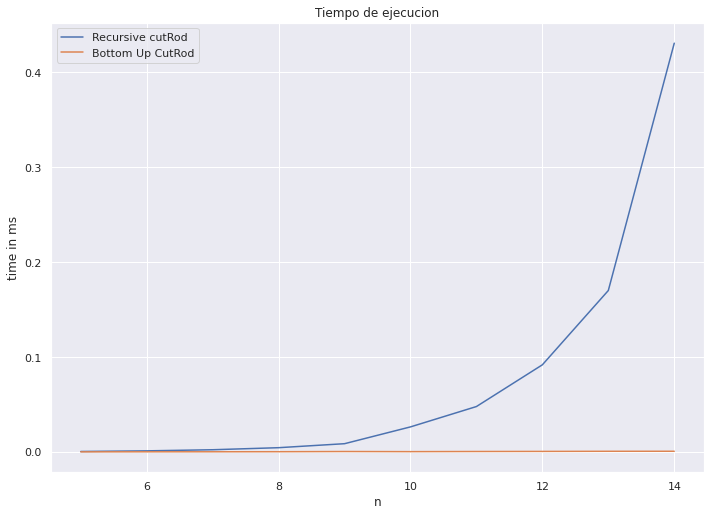

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(5,15):

  A = cutrod_instance_generator(n)
  t = repeat(setup="from __main__ import RecursiveCutRod", stmt=f"RecursiveCut({A},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,15):
    
  A = cutrod_instance_generator(n)
  t = repeat(setup="from __main__ import BottomUpCutRod", stmt=f"BottomUpCutRod({A},{n})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Recursive cutRod", "Bottom Up CutRod"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Observamos en el experimento el comportamiento lineal que tiene la implementacion del buttom-Up , haciendolo un metodo mas eficiente.

Experimento 2: Cantidad de sub-problemas en bottom-Up

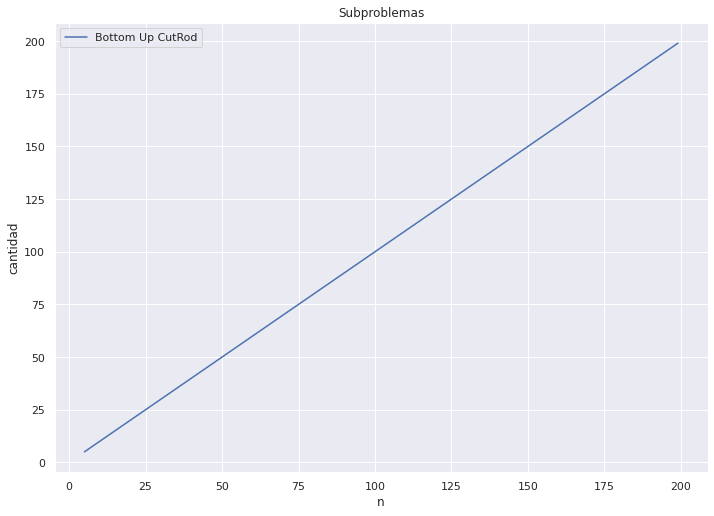

In [6]:
# Cantidad de sub-problemas resueltos

x=[]
y=[n for n in range(5,200)]

for n in range(5,200):

  A = cutrod_instance_generator(n)
  a, b, c = BottomUpCutRod(A,n)

  x.append(c)
  
plt.plot(x,y)
plt.legend(["Bottom Up CutRod"])
plt.title("Subproblemas")

plt.xlabel('n')
plt.ylabel('cantidad')
plt.show()

Obsevamos en la grafica que la cantidad de problemas a resolver, nos demuestra la comprejidad del algoritmo como $O(n^2)$